In [680]:
import pandas as pd
import seaborn as sns

In [681]:
df = pd.read_csv("data.csv")
df["_id"].size

31424

In [599]:
df.groupby(df["timezone"]).size()

timezone
America/Los_Angeles    31424
dtype: int64

In [682]:
import datetime
import pytz

In [683]:
def extractDate(curr_time_str):
    date_time_obj = ""
    if not isinstance(curr_time_str,str):
        return datetime.datetime.strptime("Tue, 16 Oct 2018 09:40:56 GMT",'%a, %d %b %Y %H:%M:%S GMT')
    if 'GMT' in curr_time_str:
        # desired_timezone = pytz.timezone("America/Los_Angeles")
        # orig_timezone = pytz.timezone("UTC")
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S GMT') 
        # date_time_obj = orig_timezone.localize(date_time_obj).astimezone(desired_timezone)
        date_time_obj = date_time_obj - datetime.timedelta(hours=7)
    else :
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S') 
    # date = date_time_obj.strftime("%m/%d/%Y")
    return date_time_obj

In [684]:
def extractTime(curr_time_str):
    date_time_obj = ""
    if 'GMT' in curr_time_str:
        desired_timezone = pytz.timezone("America/Los_Angeles")
        orig_timezone = pytz.timezone("UTC")
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S GMT') 
        date_time_obj = orig_timezone.localize(date_time_obj).astimezone(desired_timezone)

    else :
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S') 
    # date = date_time_obj.strftime("%m/%d/%Y")
    return date_time_obj

In [685]:
def extractDay(curr_time_str):
    if 'GMT' in curr_time_str:
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S GMT') 
    else :
        date_time_obj = datetime.datetime.strptime(curr_time_str, '%a, %d %b %Y %H:%M:%S') 
    day = date_time_obj.strftime("%a")
    return day

In [588]:
df['ConnectionDateTime'] = df['connectionTime'].map(extractDate)
df['ConnectionDay'] = df['connectionTime'].map(extractDate)

In [589]:
df['DisconnectionDateTime'] = df['disconnectTime'].map(extractDate)
# df['DoneChargingDateTime'] = df['doneChargingTime'].map(extractTime)

In [590]:
df.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,timezone,userID,ConnectionDateTime,ConnectionDay,DisconnectionDateTime
0,5bc90cb9f9af8b0d7fe77cd2,NaN,2_39_78_362_2018-04-25 11:08:04.400812,2-39-78-362,CA-496,2,39,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT",7.932,"Wed, 25 Apr 2018 13:21:10 GMT",America/Los_Angeles,NaN,2018-04-25 11:08:04,2018-04-25 11:08:04,2018-04-25 13:20:10
1,5bc90cb9f9af8b0d7fe77cd3,NaN,2_39_95_27_2018-04-25 13:45:09.617470,2-39-95-27,CA-319,2,39,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT",10.013,"Wed, 25 Apr 2018 16:44:15 GMT",America/Los_Angeles,NaN,2018-04-25 13:45:10,2018-04-25 13:45:10,2018-04-26 00:56:16
2,5bc90cb9f9af8b0d7fe77cd4,NaN,2_39_79_380_2018-04-25 13:45:49.962001,2-39-79-380,CA-489,2,39,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT",5.257,"Wed, 25 Apr 2018 14:51:44 GMT",America/Los_Angeles,NaN,2018-04-25 13:45:50,2018-04-25 13:45:50,2018-04-25 23:04:45
3,5bc90cb9f9af8b0d7fe77cd5,NaN,2_39_79_379_2018-04-25 14:37:06.460772,2-39-79-379,CA-327,2,39,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT",5.177,"Wed, 25 Apr 2018 16:05:22 GMT",America/Los_Angeles,NaN,2018-04-25 14:37:06,2018-04-25 14:37:06,2018-04-25 23:55:34
4,5bc90cb9f9af8b0d7fe77cd6,NaN,2_39_79_381_2018-04-25 14:40:33.638896,2-39-79-381,CA-490,2,39,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT",10.119,"Wed, 25 Apr 2018 17:40:30 GMT",America/Los_Angeles,NaN,2018-04-25 14:40:34,2018-04-25 14:40:34,2018-04-25 23:03:12


In [595]:
df["doneChargingTime"].describe()

count                             29369
unique                            29253
top       Tue, 16 Oct 2018 16:40:56 GMT
freq                                  8
Name: doneChargingTime, dtype: object

In [591]:
df["Duration"] = df["DisconnectionDateTime"] - df["ConnectionDateTime"]
df["Duration"] = df["Duration"] / datetime.timedelta(hours = 1)
df.head()

,_id,userInputs,sessionID,stationID,spaceID,siteID,clusterID,connectionTime,disconnectTime,kWhDelivered,doneChargingTime,timezone,userID,ConnectionDateTime,ConnectionDay,DisconnectionDateTime,Duration
0,5bc90cb9f9af8b0d7fe77cd2,NaN,2_39_78_362_2018-04-25 11:08:04.400812,2-39-78-362,CA-496,2,39,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT",7.932,"Wed, 25 Apr 2018 13:21:10 GMT",America/Los_Angeles,NaN,2018-04-25 11:08:04,2018-04-25 11:08:04,2018-04-25 13:20:10,2.201667
1,5bc90cb9f9af8b0d7fe77cd3,NaN,2_39_95_27_2018-04-25 13:45:09.617470,2-39-95-27,CA-319,2,39,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT",10.013,"Wed, 25 Apr 2018 16:44:15 GMT",America/Los_Angeles,NaN,2018-04-25 13:45:10,2018-04-25 13:45:10,2018-04-26 00:56:16,11.185000
2,5bc90cb9f9af8b0d7fe77cd4,NaN,2_39_79_380_2018-04-25 13:45:49.962001,2-39-79-380,CA-489,2,39,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT",5.257,"Wed, 25 Apr 2018 14:51:44 GMT",America/Los_Angeles,NaN,2018-04-25 13:45:50,2018-04-25 13:45:50,2018-04-25 23:04:45,9.315278
3,5bc90cb9f9af8b0d7fe77cd5,NaN,2_39_79_379_2018-04-25 14:37:06.460772,2-39-79-379,CA-327,2,39,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT",5.177,"Wed, 25 Apr 2018 16:05:22 GMT",America/Los_Angeles,NaN,2018-04-25 14:37:06,2018-04-25 14:37:06,2018-04-25 23:55:34,9.307778
4,5bc90cb9f9af8b0d7fe77cd6,NaN,2_39_79_381_2018-04-25 14:40:33.638896,2-39-79-381,CA-490,2,39,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT",10.119,"Wed, 25 Apr 2018 17:40:30 GMT",America/Los_Angeles,NaN,2018-04-25 14:40:34,2018-04-25 14:40:34,2018-04-25 23:03:12,8.377222


In [592]:
df['date'] = df['ConnectionDateTime'].dt.day
df['month'] = df['ConnectionDateTime'].dt.month
df['hour'] = df['ConnectionDateTime'].dt.hour
df['minute'] = df['ConnectionDateTime'].dt.minute
df['day'] = df['ConnectionDateTime'].dt.weekday

In [593]:
df_free = df[df["ConnectionDateTime"] < datetime.datetime(2018,11,1)]
df_free.shape

(13082, 22)

In [594]:
df_paid = df[(df["ConnectionDateTime"] >= datetime.datetime(2018,11,1)) & (df["ConnectionDateTime"] < datetime.datetime(2020,1,1)) ]
df_paid.shape

(12832, 22)

In [545]:
from datetime import timedelta
df = df[df["Duration"] < 12]
df.shape


(29909, 22)

In [546]:
df = df[df["kWhDelivered"] <= 25]
df.shape

(28462, 22)

In [547]:
import matplotlib.pyplot as plt

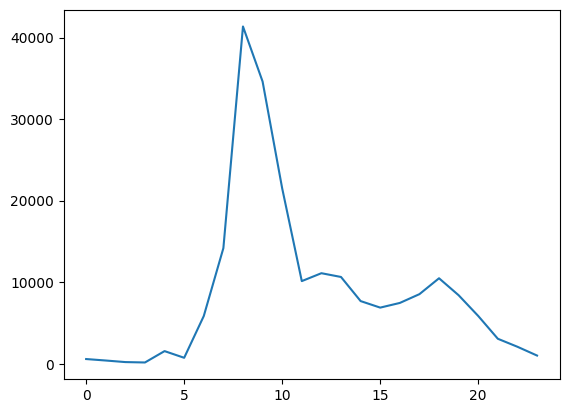

In [548]:
plt.plot(df.groupby(df["ConnectionDateTime"].dt.hour)["kWhDelivered"].sum())

<AxesSubplot: xlabel='ConnectionDateTime', ylabel='Density'>

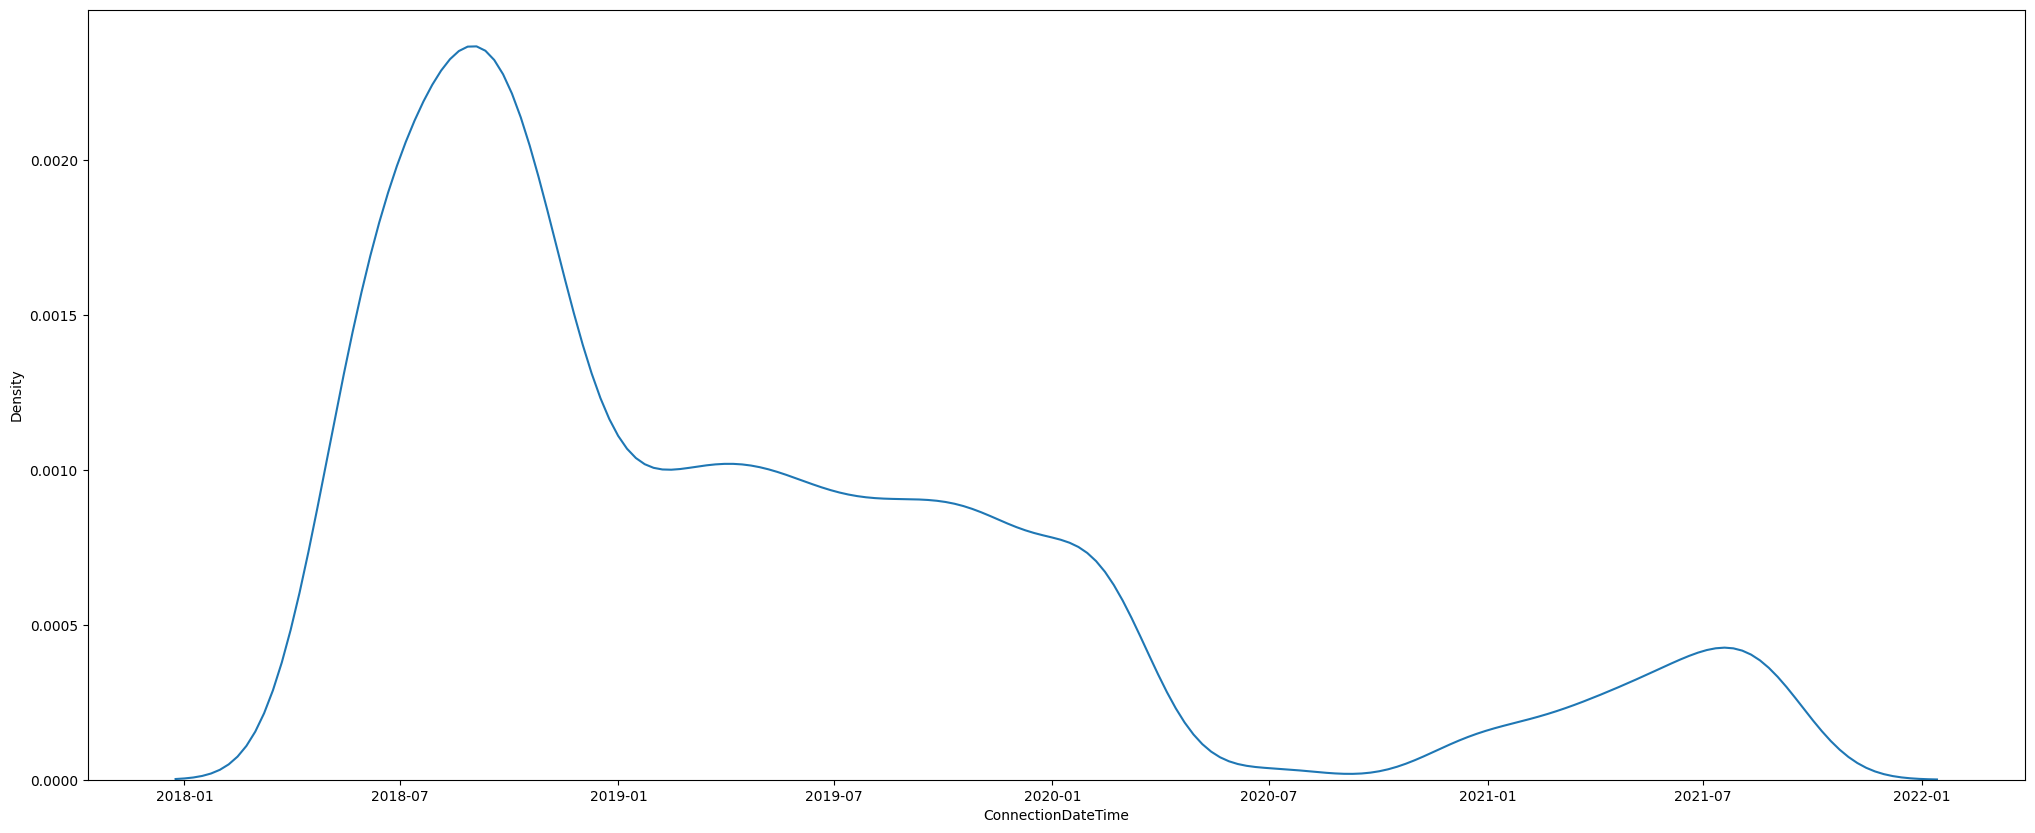

In [549]:
plt.figure(figsize=(25,10))
df["Month"] = df["ConnectionDateTime"].dt.strftime("%Y-%m") 
sns.kdeplot(df["ConnectionDateTime"])
# plt.scatter(df["ConnectionDateTime"],df["kWhDelivered"])


In [550]:
df.columns

Index(['_id', 'userInputs', 'sessionID', 'stationID', 'spaceID', 'siteID',
       'clusterID', 'connectionTime', 'disconnectTime', 'kWhDelivered',
       'doneChargingTime', 'timezone', 'userID', 'ConnectionDateTime',
       'ConnectionDay', 'DisconnectionDateTime', 'Duration', 'date', 'month',
       'hour', 'minute', 'day', 'Month'],
      dtype='object')

In [551]:
# covid_starts = datetime.datetime(2020, 3, 1)
# covid_ends = datetime.datetime(2021, 5, 1)
# df_wo_covid = df[(df["ConnectionDateTime" ] <= covid_starts) | (df["ConnectionDateTime" ] >= covid_ends) ]
# len(df_wo_covid)

<AxesSubplot: xlabel='ConnectionDateTime', ylabel='Density'>

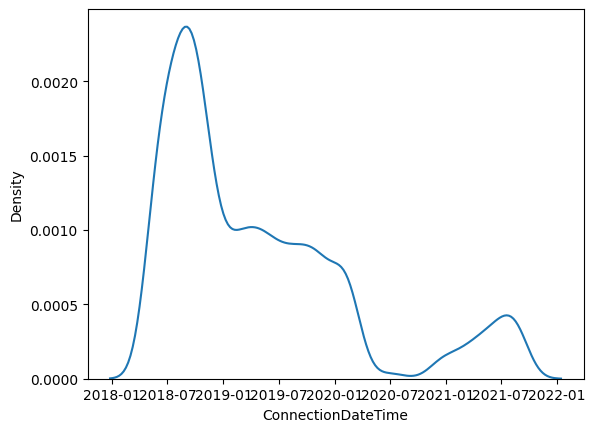

In [552]:
sns.kdeplot(df["ConnectionDateTime"])

[]

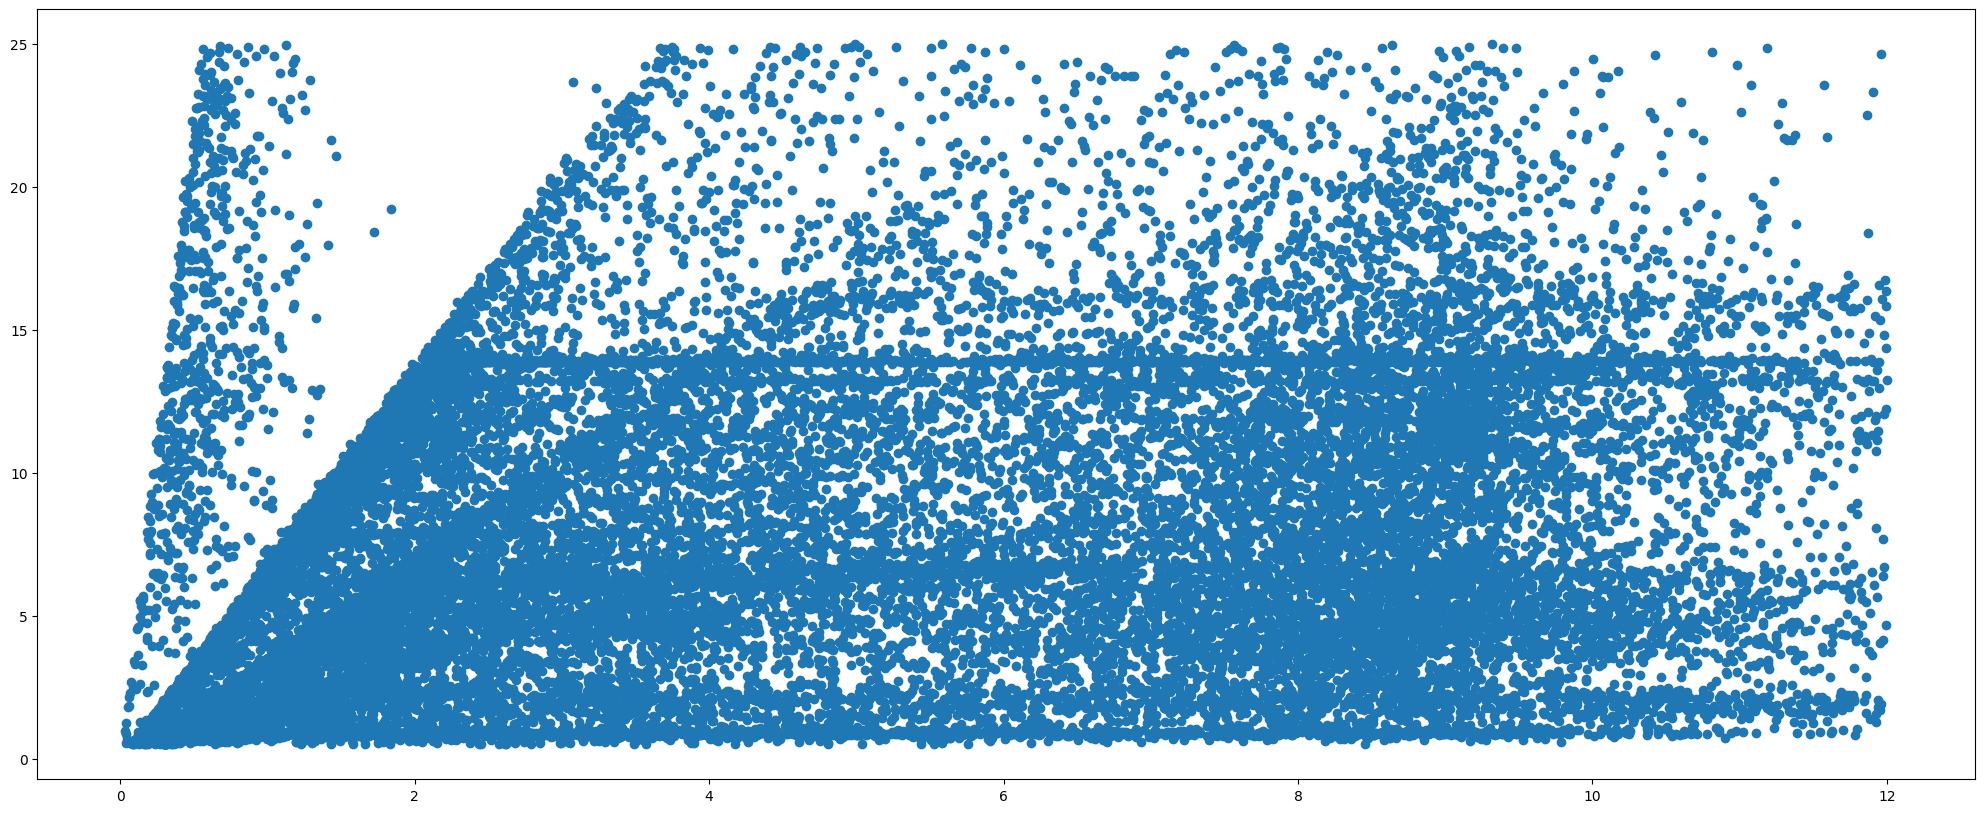

In [553]:
plt.figure(figsize=(25,10))
plt.scatter(df["Duration"],df["kWhDelivered"])
plt.plot()

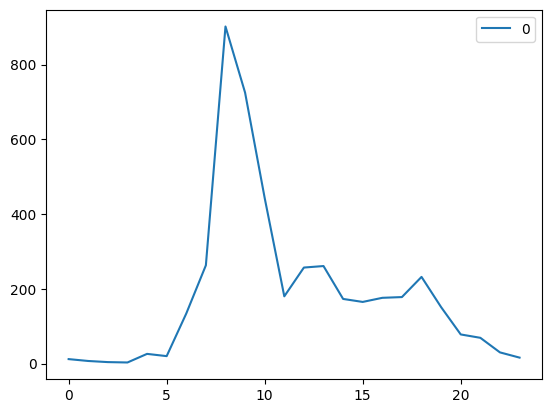

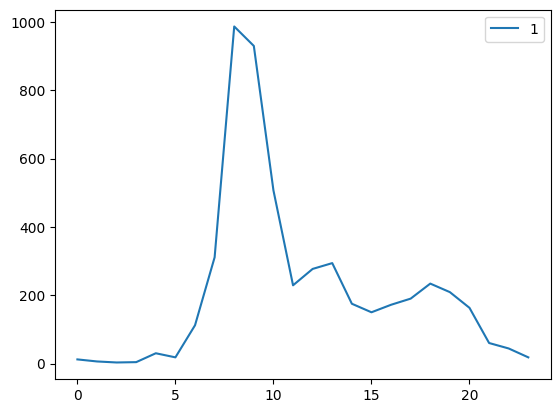

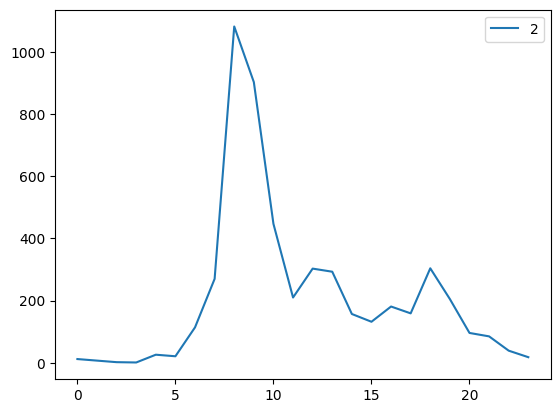

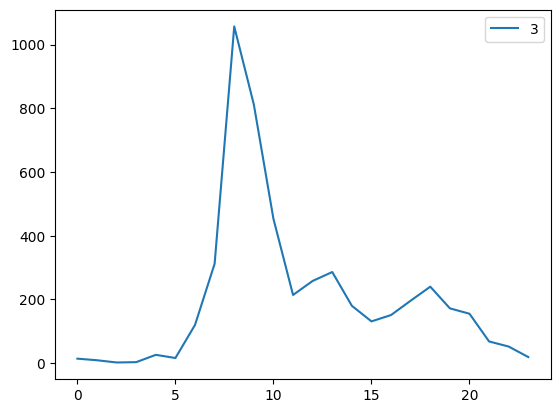

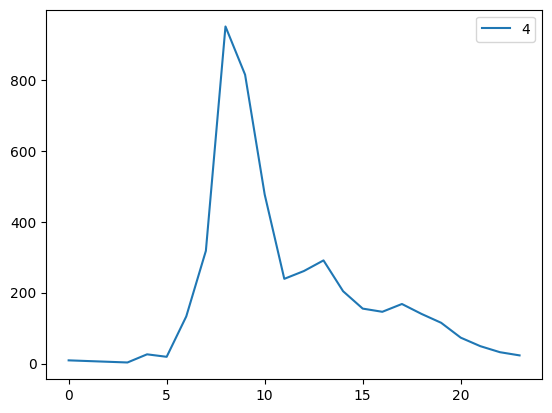

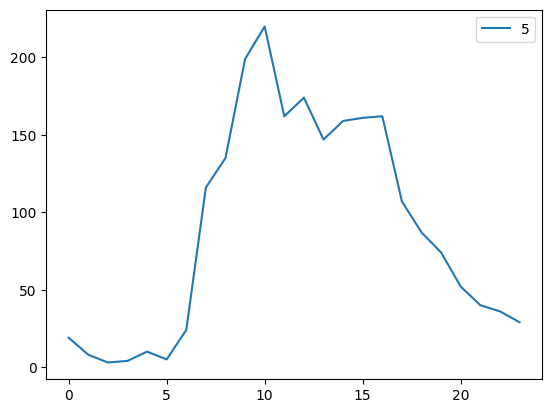

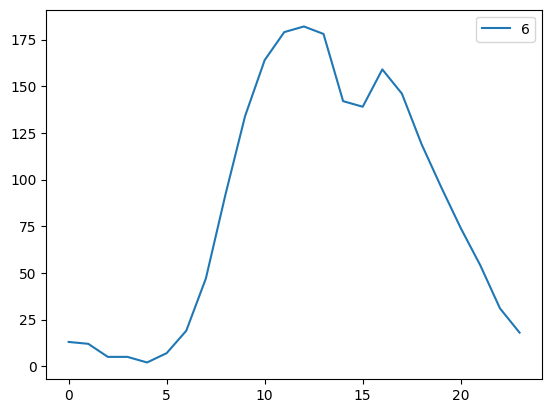

In [554]:
days = df.groupby(df["ConnectionDateTime"].dt.weekday)
for key, day in days:
  plt.plot(day.groupby(df["ConnectionDateTime"].dt.hour)["kWhDelivered"].size(),label=key)
  plt.legend(loc='best')
  plt.show()


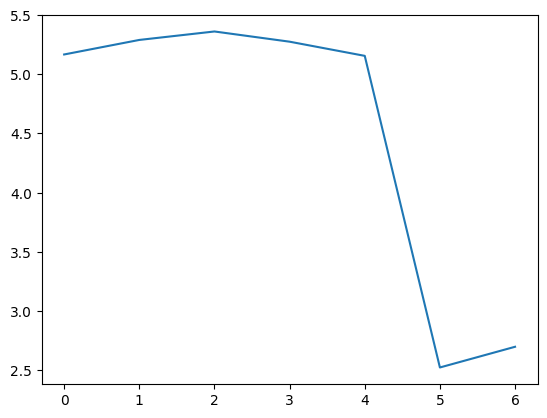

In [568]:
plt.plot(df.groupby(df["ConnectionDateTime"].dt.weekday)["Duration"].mean())

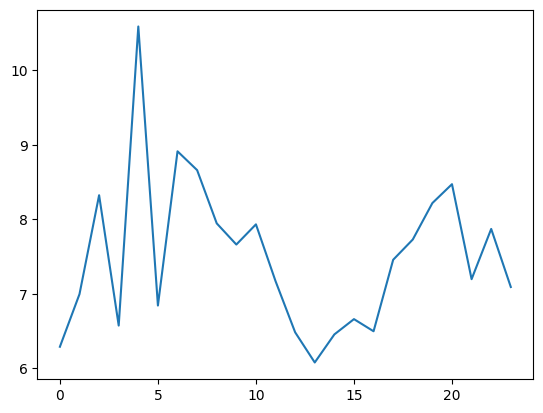

In [556]:
plt.plot(df.groupby(df["ConnectionDateTime"].dt.hour)["kWhDelivered"].mean())

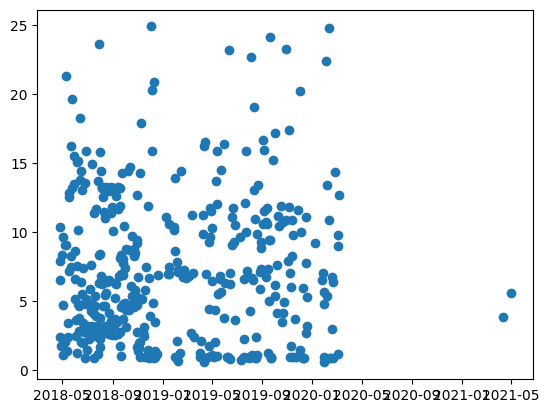

In [557]:
df_grouped = df.groupby("stationID")

df2 = df_grouped.get_group("2-39-78-362").reset_index()
plt.scatter(df2["ConnectionDateTime"],df2["kWhDelivered"])


<AxesSubplot: xlabel='kWhDelivered', ylabel='Density'>

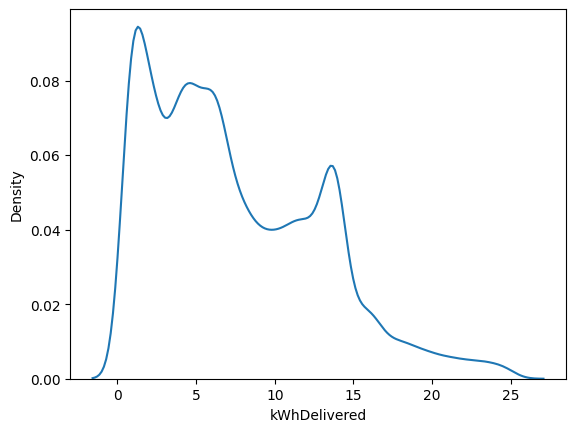

In [558]:
sns.kdeplot(df["kWhDelivered"])


In [559]:
from sklearn.model_selection import train_test_split
from numpy import asarray
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from sklearn.model_selection import GridSearchCV

In [560]:
X = df[['day','hour','stationID']]
y = df["kWhDelivered"]

In [561]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
  if X[column_name].dtype == object:
    X[column_name] = le.fit_transform(X[column_name])
  else:
    pass
X = X.values
y = y.values

/var/folders/f7/jqgtrh7d1zd6rb0wwb3rzgd00000gn/T/ipykernel_83068/1115644421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])


In [562]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.min(y,axis = 0))/(np.max(y,axis=0) - np.min(y,axis = 0))

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [564]:
rf = RandomForestRegressor(criterion="friedman_mse", n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=250,
                      random_state=42)

In [565]:
y_pred = rf.predict(X_test)

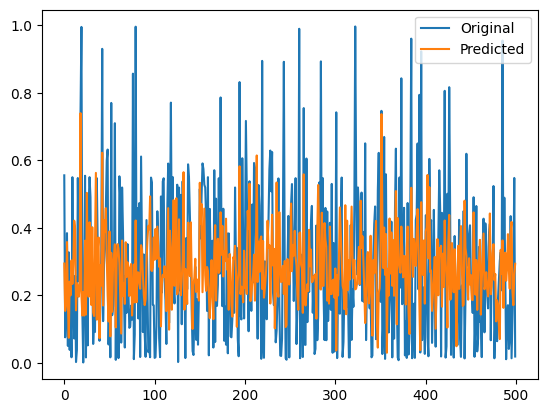

In [566]:
plt.plot(y_test[:500],label = "Original")
plt.plot(y_pred[:500], label = "Predicted")
plt.legend()
plt.show()

In [567]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {}".format(mse))
r2 = r2_score(y_test, y_pred)
print("R-squared: {}%".format(r2*100))

importance_scores = rf.feature_importances_
print(importance_scores)

Mean squared error: 0.04980449511848666
R-squared: -2.990999136311867%
[0.26902412 0.29870214 0.43227374]


In [216]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn import preprocessing

ModuleNotFoundError: No module named 'tensorflow'

In [686]:
df['ConnectionDateTime'] = df['connectionTime'].map(extractDate)
df['ConnectionDateTime'] = df['ConnectionDateTime'].dt.round("H")

df['disconnectTime'] = df['disconnectTime'].map(extractDate)
df['doneChargingTime'] = df['doneChargingTime'].map(extractDate)
df['DisconnectionDateTime'] = df[['disconnectTime','doneChargingTime']].values.min(axis=1)
df['DisconnectionDateTime'] = df['DisconnectionDateTime'].dt.round("H")


In [687]:

min_date = min(df["ConnectionDateTime"])
max_date = datetime.datetime(2020,1,31,23)


In [688]:
df = df[df["ConnectionDateTime"] <= max_date]
df.shape

(26737, 15)

In [689]:

df1 = pd.DataFrame(
index=pd.date_range(start=min_date,end=max_date,freq="h"))
df1["kwh"] = 0
print(df1.head())
for i in range(len(df)):
    start = df.loc[i,"ConnectionDateTime"]
    end = df.loc[i,"DisconnectionDateTime"]
    while (start <= end):
        df1.loc[str(start),"kwh"] += df.loc[i,"kWhDelivered"]
        # print(start)
        start = start + datetime.timedelta(hours=1)
print("Converted to timeseries data")

                     kwh
2018-04-25 04:00:00    0
2018-04-25 05:00:00    0
2018-04-25 06:00:00    0
2018-04-25 07:00:00    0
2018-04-25 08:00:00    0
Converted to timeseries data


In [690]:
df1["datetime"] = pd.date_range(start=min_date,end=max_date,freq="h")

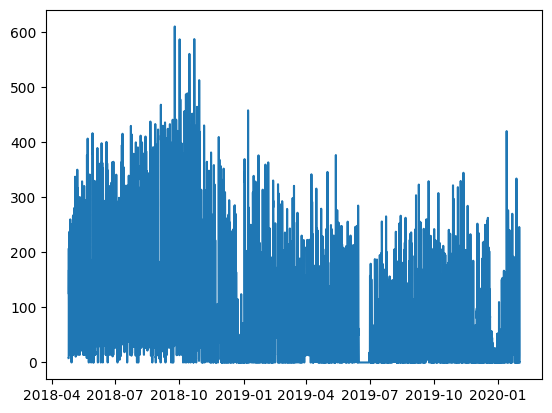

In [692]:
plt.plot(df1["kwh"])
plt.show()

In [693]:
df1.head()

,kwh,datetime
2018-04-25 04:00:00,7.932,2018-04-25 04:00:00
2018-04-25 05:00:00,7.932,2018-04-25 05:00:00
2018-04-25 06:00:00,7.932,2018-04-25 06:00:00
2018-04-25 07:00:00,15.270,2018-04-25 07:00:00
2018-04-25 08:00:00,80.835,2018-04-25 08:00:00


In [694]:
df1['date'] = df1['datetime'].dt.day
df1['month'] = df1['datetime'].dt.month
df1['hour'] = df1['datetime'].dt.hour
df1['day'] = df1['datetime'].dt.weekday

In [695]:
df1.head()

,kwh,datetime,date,month,hour,day
2018-04-25 04:00:00,7.932,2018-04-25 04:00:00,25,4,4,2
2018-04-25 05:00:00,7.932,2018-04-25 05:00:00,25,4,5,2
2018-04-25 06:00:00,7.932,2018-04-25 06:00:00,25,4,6,2
2018-04-25 07:00:00,15.270,2018-04-25 07:00:00,25,4,7,2
2018-04-25 08:00:00,80.835,2018-04-25 08:00:00,25,4,8,2


In [711]:
X = df1[['day','hour','month','date']].values
y = df1["kwh"].values

In [712]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.min(y,axis = 0))/(np.max(y,axis=0) - np.min(y,axis = 0))

In [713]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [714]:
rf = RandomForestRegressor(criterion="friedman_mse", n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=150,
                      random_state=42)

In [715]:
y_pred = rf.predict(X_test)

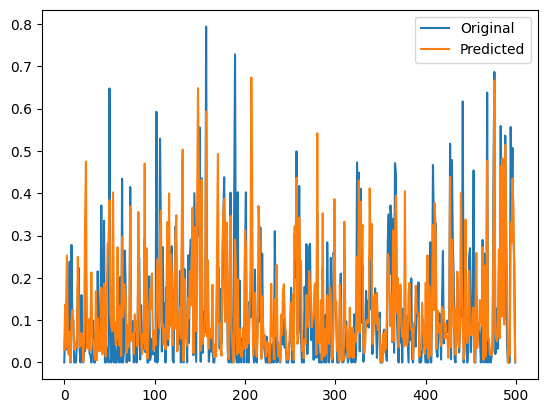

In [716]:
plt.plot(y_test[:500],label = "Original")
plt.plot(y_pred[:500], label = "Predicted")
plt.legend()
plt.show()

In [717]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {}".format(mse))
r2 = r2_score(y_test, y_pred)
print("R-squared: {}%".format(r2*100))

importance_scores = rf.feature_importances_
print(importance_scores)

Mean squared error: 0.010173779424155748
R-squared: 55.65715343044868%
[0.23216348 0.39242776 0.13870598 0.23670278]
